# Review of regressions


* based on Hands On ML with python from this amazing [book](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646/?tag=googleshopp00-20&linkCode=df0&hvadid=379733272930&hvpos=&hvnetw=g&hvrand=16822952529302315757&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001652&hvtargid=pla-523968811896&psc=1)


------- lets look at some metrics ------

* Mean squared error: MSE;

$$
mse = \frac{1}{N}\sum_i (y_{p_i} - y_{t_i})^2
$$

$$ 
RMSE = \sqrt{mse}
$$


In [1]:
from sklearn.metrics import (mean_squared_error, 
                             mean_absolute_error)

In [2]:
from matplotlib import pyplot as plt
x = [0, 1, 2, 3, 4, ] # time in years
y_t = [3.3, 5, 8, 10, 15] # weight in kg.

y_p = [3, 5.5, 7.5, 10.5, 14]

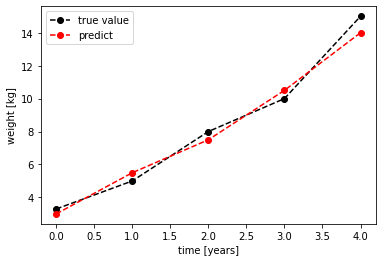

In [3]:
plt.plot(x,y_t, '--o', label='true value', color='k')
plt.plot(x,y_p, '--o', label='predict', color='r')
plt.xlabel('time [years]')
plt.ylabel('weight [kg]')
plt.legend()

In [4]:
(1/5)*((3-3.3)**2 + (5 - 5.5)**2 + (8-7.5)**2 + (10 - 10.5)**2 + (15 - 14)**2)

0.368

In [5]:
mse = mean_squared_error(y_t, y_p)
mse

0.368

In [6]:
import numpy as np

np.sqrt(0.368)

0.6066300355241241

In [7]:
rmse = mean_squared_error(y_t, y_p, squared=False)
rmse

0.6066300355241241

$$
MAE = \frac{1}{N}\sum_i |y_p - y_t|
$$

In [8]:
import numpy as np 
np.sqrt(0.368)

0.6066300355241241

# Simulating

$$
y_p = ax + b
$$

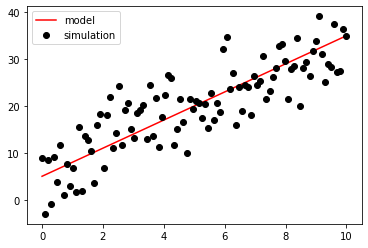

In [9]:
x = np.linspace(0, 10, 100)

a = 3
b = 5

y_p = a*x + b

y_t = y_p + np.random.normal(0, 5, 100)

plt.plot(x,y_p, '-', color='r', label='model')
plt.plot(x,y_t, 'o',color='k', label='simulation')
plt.legend()

In [10]:
mse = mean_squared_error(y_p, y_t)
mse

25.75078228807296

In [11]:
rmse = mean_squared_error(y_p, y_t, squared=False)
rmse

5.074522863094909

In [12]:
mae = mean_absolute_error(y_p, y_t)
mae

4.134345757279805

In [13]:
residues = y_p - y_t

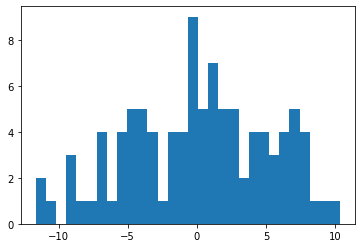

In [14]:
_ = plt.hist(residues, bins=30)

In [15]:
np.mean(residues), np.std(residues)

(0.06672429691383347, 5.0740841692146095)

# Linear Regression

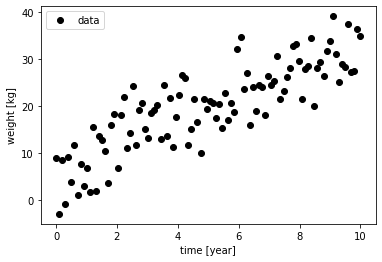

In [16]:
# given y_t and x is known but we have no knowledge of y_p 
plt.plot(x,y_t, 'o',color='k', label='data')

plt.xlabel('time [year]')
plt.ylabel('weight [kg]')
plt.legend()

# I want a model to infer the weight within 5 years ahead
# weight in x = 15

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x.reshape(-1,1), y_t.reshape(-1,1))

LinearRegression()

In [19]:
y_pred = model.predict([[15]])
y_pred

array([[46.54671736]])

In [20]:
y_preds = model.predict(x.reshape(-1,1))

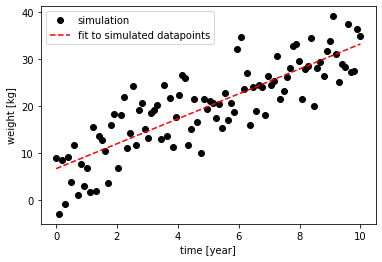

In [21]:
plt.plot(x,y_t, 'o',color='k', label='simulation')
plt.plot(x,y_preds, '--',color='r', label='fit to simulated datapoints')

plt.xlabel('time [year]')
plt.ylabel('weight [kg]')
plt.legend()

In [22]:
mean_squared_error(y_pred=y_preds, y_true=y_t, squared=False)

4.977076551325612

In [22]:
# I want a model to infer the weight within 5 years ahead
# weight in x = 15

# weight = 50.47616673 +/- 5.023588267429338 CL 68%

In [23]:
model.coef_ # this is parameter a

array([[2.91724649]])

In [24]:
model.intercept_ # this is the parameter b

array([5.8165541])

In [25]:
# parameter estimation of an linear model 
# a = 3.08 (real is 3)
# b = 4.16 (real is 5)

### Parameter estimation with statsmodel (statistics like api)

In [26]:
import statsmodels.api as sm

In [27]:
X = sm.add_constant(x)
sm_model = sm.OLS(y_t, X)

In [28]:
result = sm_model.fit()

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     234.7
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           9.26e-28
Time:                        10:27:06   Log-Likelihood:                -312.30
No. Observations:                 100   AIC:                             628.6
Df Residuals:                      98   BIC:                             633.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8166      1.102      5.278      0.000       3.629       8.004
x1             2.9172      0.190     15.321      0.000       2.539       3.295
==============================================================================
Omnibus:                        0.375   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.522
Skew:                          -0.120   Prob(JB):                        0.770
Kurtosis:                       2.740   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# measured values of parameters a and b
# b = 4.1649 +/- 1.007
# a = 3.0874 +/- 0.174 kg per years (rate of change of your target value)

In [31]:
a = 3.0874
b = 4.1649

y_es = a*15 + b
y_es

# error propagation to estimate the value given the errors of parameters a and b

50.4759

In [32]:
# scikit learn inference 50.47616673 +/- 5

### Notes: 

* Supervised data is data where you know the target (outcome of the descriptive features)

In [25]:
import pandas as pd
pd.DataFrame([{
    "wheel_diameter": 3, 
    "weight": 2,
    # "name": "skate"
}, 
{
    "wheel_diameter": 80, 
    "weight": 15,
    #"name": "bike"
},
])

,wheel_diameter,weight
0,3,2
1,80,15
